In [13]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("respostas.csv") 

In [14]:
pd.concat([df.head(), df.tail()])


,Carimbo de data/hora,Qual sua idade?,Você se identifica como:,Você atualmente,"Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)",Em qual estado você mora?,Você já ouviu falar na expressão “crise dos 20 anos”?,Você sente a necessidade de ser produtivo no seu dia e se culpa se não for?,Você sente que as redes sociais te influência na produtividade do seu dia?,Com que frequência você se sente perdido(a) em relação ao futuro?,...,Você já pensou em desistir da faculdade ou trocar de curso?,Você tem clareza sobre seus planos para os próximos 5 anos?,Com que frequência você se compara com colegas da sua idade nas redes sociais?,Você sente que está ficando “para trás” em relação a outras pessoas da sua idade?,Você já buscou ajuda profissional para lidar com inseguranças ou crises pessoais?,A universidade ou seu meio social oferece apoio emocional suficiente?,"Você sente que suas relações pessoais mudaram nessa fase da vida? (ex: amizades, familía ou relações amorosas)",Se puder fale um pouco sobre essas mudanças (exemplo: não conseguir conciliar vida social e academica),Quando você era criança imaginava estar como é hoje?,Se puder fale um pouco sobre isso
0,14/07/2025 21:18:32,20,Homem,Estuda e trabalha,UFPB,Paraíba,Sim,Sim,Sim,5,...,Não,Não faço ideia,5,Sim,"Tenho vontade, mas não tenho acesso",Não,Sim,NaN,Em parte,NaN
1,14/07/2025 21:19:23,19,Mulher,Estuda,ufpb,pb,"Já ouvi, mas não sei exatamente o que é",Sim,Sim,4,...,Sim,Tenho uma ideia geral,4,Sim,Não,Nunca parei pra pensar nisso,Sim,não consegui conciliar bem as duas faculdades ...,Em parte,"fiz o curso que eu sonhava, mas minha vida não..."
2,14/07/2025 21:19:27,20,Mulher,Estuda e trabalha,UFPB,Paraíba,Sim,Sim,Sim,5,...,Sim,Tenho uma ideia geral,3,Sim,"Tenho vontade, mas não tenho acesso",Sim,Sim,NaN,Não,NaN
3,14/07/2025 21:21:01,20,Mulher,Estuda e trabalha,Ufpb,Pb,Sim,Sim,Sim,4,...,Talvez,Tenho uma ideia geral,5,Sim,Sim,Não,Sim,NaN,Não,NaN
4,14/07/2025 21:24:14,20,Outro,Estuda,UFPB,Paraíba,Sim,Sim,Sim,4,...,Sim,Tenho uma ideia geral,2,Sim,Não,Sim,Sim,NaN,Em parte,NaN
101,27/07/2025 14:17:59,23,Mulher,Estuda,UFPB,PB,Sim,Sim,Sim,3,...,Não,Tenho uma ideia geral,3,Não,"Tenho vontade, mas não tenho acesso",Não,Sim,NaN,Em parte,NaN
102,27/07/2025 14:28:56,20,Mulher,Estuda,Ufpb,Paraíba,Sim,Sim,Sim,5,...,Não,Tenho uma ideia geral,4,Sim,Sim,Não,Sim,"Estudo integral, não consigo conciliar com emp...",Sim,NaN
103,27/07/2025 15:19:42,20,Mulher,Estuda,UFPB,PB,"Já ouvi, mas não sei exatamente o que é",Sim,Sim,1,...,Não,"Sim, com clareza",1,Não,"Tenho vontade, mas não tenho acesso",Nunca parei pra pensar nisso,Não,"Como estou na universidade, tenho tido mais te...",Em parte,"Não, em partes imaginava que estaria na univer..."
104,27/07/2025 15:25:11,20,Homem,Estuda,UFPB,PB,"Já ouvi, mas não sei exatamente o que é",Sim,Não,2,...,Não,"Sim, com clareza",1,Não,"Tenho vontade, mas não tenho acesso",Nunca parei pra pensar nisso,Não,NaN,Não,"Tudo mudou as 13 anos, quando me tornei crente..."
105,27/07/2025 15:51:41,19,Mulher,Estuda,ufpb,pb,"Já ouvi, mas não sei exatamente o que é",Sim,Sim,5,...,Sim,Tenho uma ideia geral,5,Sim,Sim,Nunca parei pra pensar nisso,Sim,NaN,Em parte,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 22 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Carimbo de data/hora                                                                                             106 non-null    object
 1   Qual sua idade?                                                                                                  106 non-null    object
 2   Você se identifica como:                                                                                         106 non-null    object
 3   Você atualmente                                                                                                  106 non-null    object
 4   Se você estuda, onde você estuda? (ex: ufpb,

In [16]:
df.describe()

,Com que frequência você se sente perdido(a) em relação ao futuro?,Com que frequência você se compara com colegas da sua idade nas redes sociais?
count,106.000000,106.000000
mean,3.924528,3.537736
std,0.963111,1.295961
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [17]:
# Função criada com o objetivo de extrair/limpar a idade da coluna "Qual sua idade?"

def extrair_idade(valor):
    if pd.isna(valor):
        return None
    match = re.search(r"\d{1,3}", str(valor))
    return int(match.group(0)) if match else None

df["Idade"] = df["Qual sua idade? "].apply(extrair_idade).astype('Int64')



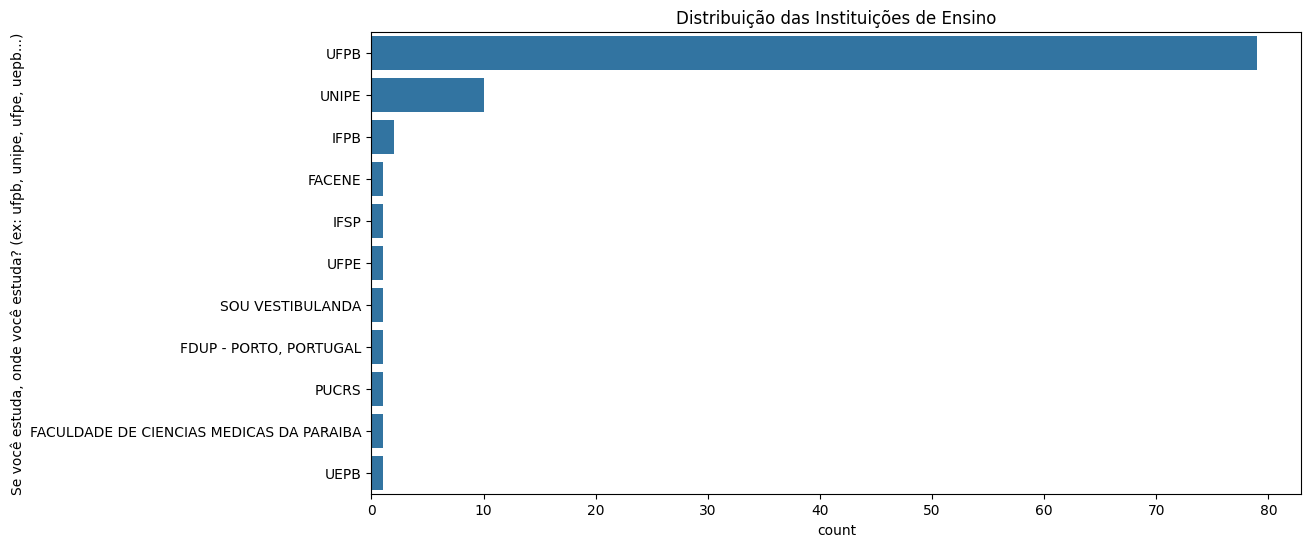

In [18]:
# Tentando uniformizar a coluna "Qual sua instituição de ensino?" para facilitar a análise

from uniformizar_instituicoes import uniformizar_instituicao
df['Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)'] = df['Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)'].apply(uniformizar_instituicao)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)', order=df['Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)'].value_counts().index)
plt.title('Distribuição das Instituições de Ensino')
plt.show()

In [19]:
# Categorizar instituições em públicas e privadas
publicas = [
    'UFPB',
    'IFPB',
    'IFSP',
    'UFPE',
    'UEPB',
    'FDUP - PORTO, PORTUGAL'
 ]
privadas = [
    'UNIPE',
    'FACENE',
    'PUCRS',
    'FACULDADE DE CIENCIAS MEDICAS DA PARAIBA'
    # Adicione outras privadas se necessário
 ]

def classificar_instituicao(nome):
    if pd.isna(nome) or nome == '':
        return 'Não informado'
    nome = nome.upper().strip()
    if nome in publicas:
        return 'Pública'
    elif nome in privadas:
        return 'Privada'
    else:
        return 'Outra/Não identificado'

df['Tipo_Instituicao'] = df['Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)'].apply(classificar_instituicao)

# Visualizar a contagem de cada tipo
print(df['Tipo_Instituicao'].value_counts())

Tipo_Instituicao
Pública                   85
Privada                   13
Não informado              7
Outra/Não identificado     1
Name: count, dtype: int64


Porcentagem de respostas por tipo de instituição:
Você já pensou em desistir da faculdade ou trocar de curso?    Não     Sim  \
Tipo_Instituicao                                                             
Não informado                                                14.29   57.14   
Outra/Não identificado                                        0.00  100.00   
Privada                                                       7.69   84.62   
Pública                                                      27.06   60.00   

Você já pensou em desistir da faculdade ou trocar de curso?  Talvez  
Tipo_Instituicao                                                     
Não informado                                                 28.57  
Outra/Não identificado                                         0.00  
Privada                                                        7.69  
Pública                                                       12.94  


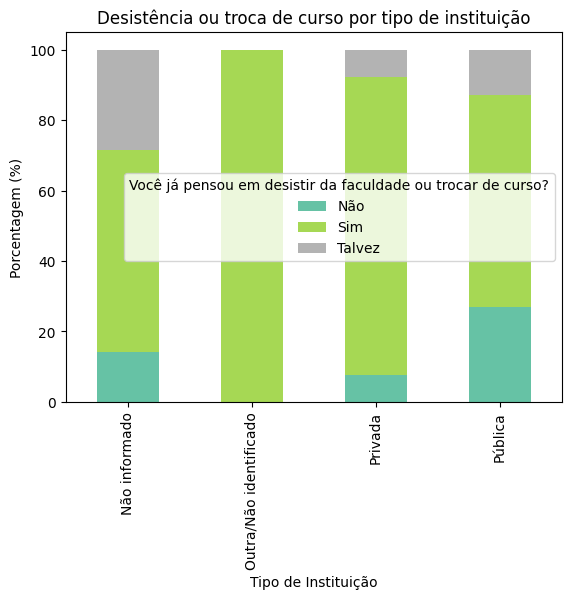

In [20]:
# Comparando públicas e privadas quanto à desistência ou troca de curso

col_resposta = "Você já pensou em desistir da faculdade ou trocar de curso?"

# Tabela cruzada de porcentagens por tipo de instituição
crosstab_desistencia = pd.crosstab(
    df["Tipo_Instituicao"],
    df[col_resposta],
    normalize='index'
) * 100

print("Porcentagem de respostas por tipo de instituição:")
print(crosstab_desistencia.round(2))

# Gráfico
crosstab_desistencia.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Desistência ou troca de curso por tipo de instituição")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Tipo de Instituição")
plt.legend(title=col_resposta)
plt.show()

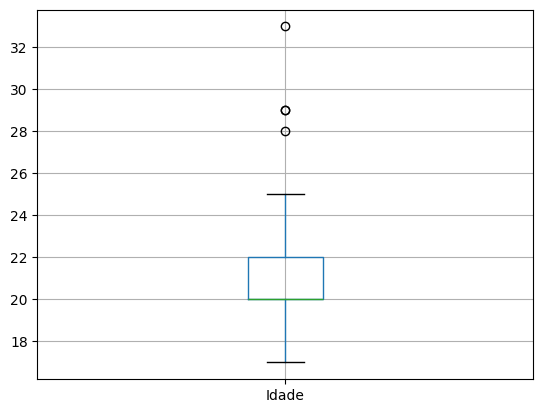

0    20
1    19
2    20
3    20
4    20
Name: Idade, dtype: Int64
Int64


In [21]:
#Conferindo se deu tudo certo!!

df.boxplot(column="Idade")
plt.show() 
print(df["Idade"].head())
print(df["Idade"].dtype)

In [22]:
#Ao longo da análise precisei conferir o nome das colunas para evitar erros de digitação
print(df.columns.tolist())

['Carimbo de data/hora', 'Qual sua idade? ', 'Você se identifica como:', 'Você atualmente', 'Se você estuda, onde você estuda? (ex: ufpb, unipe, ufpe, uepb...)', 'Em qual estado você mora?', 'Você já ouviu falar na expressão “crise dos 20 anos”?', 'Você sente a necessidade de ser produtivo no seu dia e se culpa se não for?', 'Você sente que as redes sociais te influência na produtividade do seu dia?', 'Com que frequência você se sente perdido(a) em relação ao futuro?', 'Quais desses sentimentos você já teve nos últimos meses? (marque todos os que se aplicam)', 'Você já teve dúvidas se está no curso/carreira certa?', 'Você já pensou em desistir da faculdade ou trocar de curso?', 'Você tem clareza sobre seus planos para os próximos 5 anos?', 'Com que frequência você se compara com colegas da sua idade nas redes sociais? ', 'Você sente que está ficando “para trás” em relação a outras pessoas da sua idade?', 'Você já buscou ajuda profissional para lidar com inseguranças ou crises pessoais?

In [23]:
df.columns = df.columns.str.strip()


Porcentagens (% por linha):
Você já ouviu falar na expressão “crise dos 20 anos”?  Já ouvi, mas não sei exatamente o que é  \
Você se identifica como:                                                                         
Homem                                                                                    24.24   
Mulher                                                                                   26.39   
Outro                                                                                     0.00   

Você já ouviu falar na expressão “crise dos 20 anos”?    Não     Sim  
Você se identifica como:                                              
Homem                                                  24.24   51.52  
Mulher                                                 16.67   56.94  
Outro                                                   0.00  100.00  


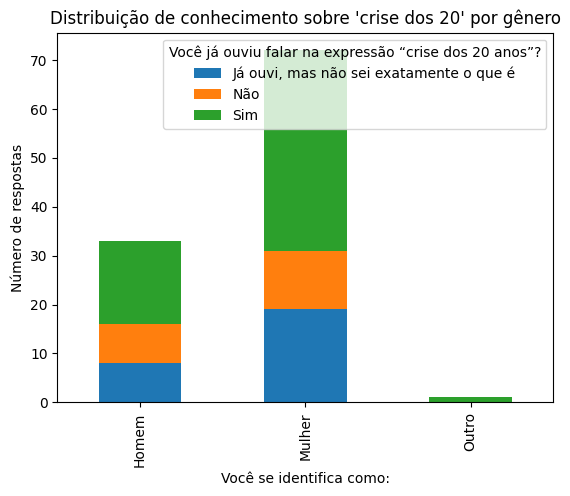

In [24]:
# Garantir que os nomes das colunas estejam sem espaços extras
df.columns = df.columns.str.strip()

# Tabela cruzada de frequências relativas (porcentagens por linha)
crosstab_pct = pd.crosstab(df["Você se identifica como:"], df["Você já ouviu falar na expressão “crise dos 20 anos”?"], normalize='index', dropna=False) * 100
print("\nPorcentagens (% por linha):")
print(crosstab_pct.round(2))


pd.crosstab(df["Você se identifica como:"], df["Você já ouviu falar na expressão “crise dos 20 anos”?"]).plot(kind="bar", stacked=True)
plt.title("Distribuição de conhecimento sobre 'crise dos 20' por gênero")
plt.ylabel("Número de respostas")
plt.show()